In [1]:
import tensorflow as tf

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
with tf.name_scope("our_inputs"):
    x_data = tf.placeholder(dtype=tf.float32, shape=(1000,), name="x_data")

    y_data = tf.placeholder(dtype=tf.float32, shape=(1000,), name="y_data")
    tf.summary.histogram("y_real",y_data)

In [4]:
with tf.name_scope("the_variables"):
    
    W = tf.Variable(initial_value=1.0) 
    tf.summary.scalar("W",W)
    b = tf.Variable(0.0)
    tf.summary.scalar("b",b)

In [5]:
with tf.name_scope("guess_for_y"):
    y_guess = x_data*W + b
    tf.summary.histogram("y_guess",y_guess)

In [6]:
with tf.name_scope("calculate_mean_squared_error"):
    squared_diff = tf.square(y_guess - y_data)

    loss = tf.reduce_mean(squared_diff)
    tf.summary.scalar("loss", loss)

In [7]:
with tf.name_scope("optimization_process"):

    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

    train_step = optimizer.minimize(loss)

In [8]:
sess = tf.Session()

In [9]:
with tf.name_scope("initialize_everything"):
    init = tf.global_variables_initializer()


In [10]:
sess.run(init)

In [11]:
x_ = np.random.uniform(low=0,high=1,size=(1000,))

In [12]:
real_w = 5.3
real_b = 2.2



In [13]:
noise = np.random.normal(size=(1000,))

In [14]:
y_ = real_w*x_ + real_b + noise

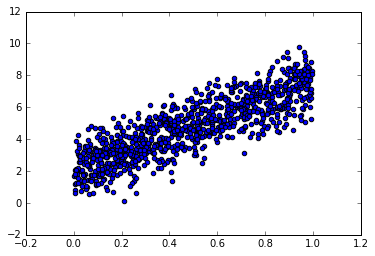

In [15]:
plt.scatter(x_,y_)

In [16]:
tf.summary.scalar("real_w", tf.constant(real_w))
tf.summary.scalar("real_b", tf.constant(real_b))

<tf.Tensor 'real_b:0' shape=() dtype=string>

In [17]:
feed_dict= {x_data:x_, y_data:y_}

In [18]:
merged = tf.summary.merge_all()
summ_writer =  tf.summary.FileWriter("./logs/lin-reg",
                                      sess.graph)

for step in range(500):
    if step == 2:
        run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
        run_metadata = tf.RunMetadata()
        _, summaries = sess.run([train_step,merged],options=run_options,run_metadata=run_metadata, feed_dict=feed_dict)
        summ_writer.add_run_metadata(run_metadata, 'step%d' % step)
        summ_writer.add_summary(summary=summaries,global_step=step)
    else:
        _, summaries = sess.run([train_step,merged],feed_dict=feed_dict)
        summ_writer.add_summary(summary=summaries,global_step=step)
        
summ_writer.close()